# Programming Lab 1 

## Handout 9

## Lara Schmalenstroer (s0laschm@uni-bonn.de)

### 1. (20pts) k-mer distributions
#### (a) (5pts) Write a function kmer_frequencies(seqs,k) that takes a set of mRNA sequences seqs and a parameter k as input and returns the relative frequencies for all k-mers contained in the sequences as a dictionary. Note, that each sequence of length n contains n−k+ 1 k-mers. For the calculation of relative frequencies use pseudocounts. That is, the frequency of each k-mer is increased by 1, regardless whether it occurs in the sequences or not.

In [1]:
from itertools import product

def kmer_frequencies(seqs,k):
    bases=('A','C','T','G')
    kmers=list(product(bases,repeat=k))
    for i in range(len(kmers)):
        kmers[i]=''.join(kmers[i])
    frequencies={kmer:1 for kmer in kmers}
    for seq in seqs:
        start=0
        end=k
        kmer=seq[start:end]
        while len(kmer)==k:
            frequencies[kmer]+=1
            start+=1
            end+=1
            kmer=seq[start:end]
    no_kmers=sum(frequencies.values())
    relative_frequencies={kmer:(frequencies[kmer]/no_kmers) for kmer in frequencies}
    return relative_frequencies

In [2]:
from fastatools import fasta_list
exosome_sensitive=fasta_list('exosome-sensitive.fa')
exosome_insensitive=fasta_list('exosome-insensitive.fa')

for i in range(len(exosome_sensitive)):
    exosome_sensitive[i]=str(exosome_sensitive[i][1])
    
for i in range(len(exosome_insensitive)):
    exosome_insensitive[i]=str(exosome_insensitive[i][1])

In [6]:
frequencies_sensitive=kmer_frequencies(exosome_sensitive,2)

In [7]:
print(frequencies_sensitive)

{'AA': 0.07429992232481042, 'AC': 0.047852321046773276, 'AT': 0.04977017753185083, 'AG': 0.07112484885369037, 'CA': 0.06226026793936531, 'CC': 0.07539298040503208, 'CT': 0.06983560086163407, 'CG': 0.040341050136532164, 'TA': 0.044897460741998255, 'TC': 0.057966111195637375, 'TT': 0.07734486983399931, 'TG': 0.06859640131647435, 'GA': 0.061701727271999296, 'GC': 0.06648836073318973, 'GT': 0.05193227043778378, 'GG': 0.08019562936922942}


In [4]:
frequencies_insensitive=kmer_frequencies(exosome_insensitive,3)

#### (b) (6 pts) Write a function log_odds_ratio(observed,background) that takes as argument a dictionary of observed frequencies of k-mers and a dictionary containing the background frequencies of the individual nucleotides and calculates the log-odds ratio.

In [5]:
from math import log

def log_odds_ratio(observed,background):
    expected_frequencies={}
    for kmer in observed:
        exp=1
        for i in range(len(kmer)):
            exp*=background[kmer[i]]
        expected_frequencies[kmer]=exp
    log_odds={kmer:log((observed[kmer]/expected_frequencies[kmer]),2) for kmer in observed}
    return log_odds

#### (c) (3pts) For the given data exosome-sensitive.fa and exosome-insensitive.fa calculate
##### i.The background frequencies of the nucleotides using the combined set of sequences.
##### ii.The observed frequencies of k-mers for a) the sensitive sequences and b) the insensitive sequences
##### iii.Using the common background frequency calculate the log-odds ratio for the set of sensitive and insensitve sequences

In [6]:
sensitive_insensitive=exosome_sensitive+exosome_insensitive

In [7]:
common_background=kmer_frequencies(sensitive_insensitive,1)

In [8]:
print(common_background)

{'A': 0.2156571373714505, 'C': 0.26542893828424685, 'T': 0.23143007427970289, 'G': 0.28748385006459976}


In [9]:
sensitive_observed={}
ks=[2,3,4,6]
for k in ks:
    sensitive_observed[k]=kmer_frequencies(exosome_sensitive,k)

In [10]:
sensitive_observed[4]

{'AAAA': 0.011270039859169615,
 'AAAC': 0.004627513252973398,
 'AAAT': 0.006389898066389176,
 'AAAG': 0.005940780662287772,
 'AACA': 0.004128271138592819,
 'AACC': 0.0034425651019737106,
 'AACT': 0.0035708843602883975,
 'AACG': 0.0014275517487508922,
 'AATA': 0.004388919632044527,
 'AATC': 0.0032260263535676763,
 'AATT': 0.004948311398760116,
 'AATG': 0.0037352934100040903,
 'AAGA': 0.004964351306049451,
 'AAGC': 0.0035789043139330657,
 'AAGT': 0.003989926938222297,
 'AAGG': 0.004601448403628227,
 'ACAA': 0.003759353270938094,
 'ACAC': 0.0035748943371107316,
 'ACAT': 0.003075652222730153,
 'ACAG': 0.004465109191668872,
 'ACCA': 0.003364370553938198,
 'ACCC': 0.004128271138592819,
 'ACCT': 0.004130276127003986,
 'ACCG': 0.0016080007057559208,
 'ACTA': 0.002329796533776035,
 'ACTC': 0.0033102358668366896,
 'ACTT': 0.003909727401775618,
 'ACTG': 0.0038195029232731036,
 'ACGA': 0.0010566288926850003,
 'ACGC': 0.0019909534922888145,
 'ACGT': 0.0014957213547305696,
 'ACGG': 0.001818524488928

In [11]:
insensitive_observed={}
for k in ks:
    insensitive_observed[k]=kmer_frequencies(exosome_insensitive,k)

In [12]:
log_odd_sensitive={}
for k in ks:
    log_odd_sensitive[k]=log_odds_ratio(sensitive_observed[k],common_background)

In [13]:
print(log_odd_sensitive[2])

{'AA': 0.6758817741658929, 'AC': -0.2584762292925918, 'AT': -0.004034285502281399, 'AG': 0.1981333051117996, 'CA': 0.12124665279415558, 'CC': 0.09777886803821711, 'CT': 0.185060659444991, 'CG': -0.9195579409126051, 'TA': -0.1526819656495606, 'TC': -0.08369232103528618, 'TT': 0.530152894141335, 'TG': 0.044075625392117526, 'GA': -0.00690949986081586, 'GC': -0.19870477226333094, 'GT': -0.3574259664726365, 'GG': -0.043438212057074675}


In [14]:
log_odd_insensitive={}
for k in ks:
    log_odd_insensitive[k]=log_odds_ratio(insensitive_observed[k],common_background)

In [15]:
print(log_odd_insensitive[3])

{'AAA': 0.38467209962686405, 'AAC': -0.5417617132941076, 'AAT': -0.3487929315634709, 'AAG': 0.07977589016790695, 'ACA': -0.35766444469694786, 'ACC': -0.19324353826458454, 'ACT': -0.3508725128247392, 'ACG': -1.1814546120282987, 'ATA': -0.9487111180255551, 'ATC': -0.7515106330429668, 'ATT': -0.28656928768454615, 'ATG': -0.5650864272915483, 'AGA': 0.19965272121195607, 'AGC': 0.18171298032452357, 'AGT': -0.19646813469170252, 'AGG': 0.4442947584512685, 'CAA': -0.4337511705503786, 'CAC': -0.24213813637936765, 'CAT': -0.5688652700967094, 'CAG': 0.4540103074872856, 'CCA': 0.16748840469195891, 'CCC': 0.7369399893341596, 'CCT': 0.5669156293928828, 'CCG': 0.16133247247726148, 'CTA': -0.8693471233368253, 'CTC': 0.3959579667086134, 'CTT': 0.20144038578192847, 'CTG': 0.6042660727379228, 'CGA': -0.8990283199401075, 'CGC': 0.03147900983718088, 'CGT': -1.0283144482159732, 'CGG': 0.16212560717647584, 'TAA': -0.46372869840813075, 'TAC': -1.0320647235832783, 'TAT': -0.8856428879087823, 'TAG': -0.825738181

#### (d) (3pts) To discriminate k-mer composition of sensitive and insensitive RNA sequences you could take either 
+ the difference or
+ the ratio
#### of the log-odds score of sensitive and insensitive sequences for eachk-mer. However, only one of the options is correct! Write a small function that determines the correct discriminatory values for each k-mer. Perform these calculations for k= 2, 3, and 4.

In [16]:
def discriminatory_values(vals_sensitive,vals_insensitive):
    discriminator={kmer:(vals_sensitive[kmer]-vals_insensitive[kmer]) for kmer in vals_sensitive}
    return discriminator

In [17]:
discriminators={}
for k in ks:
    discriminators[k]=discriminatory_values(log_odd_sensitive[k],log_odd_insensitive[k])

In [18]:
discriminators[2]

{'AA': 0.7500729882522265,
 'AC': 0.23841511308994728,
 'AT': 0.6094549759319928,
 'AG': 0.006593421260580823,
 'CA': 0.2190485666321651,
 'CC': -0.3336791005797199,
 'CT': -0.041860350435746846,
 'CG': -0.6360945820846531,
 'TA': 0.6481121620555476,
 'TC': -0.013736042250372199,
 'TT': 0.44798525088687946,
 'TG': -0.03280223512280575,
 'GA': -0.005885890017173005,
 'GC': -0.4194398310245864,
 'GT': -0.02645097658799994,
 'GG': -0.468150137457879}

#### (e) (3pts) Sort the k-mers from the lowest to the highest discriminatory values. What are the 16 kmers with highest/lowest scores? Plot the discriminatory values from lowest to highest for all k-mers using matplotlib or a Python plotting library of your choice. The x-axis contains the k-mers in increasing order of their discriminatory value and the y-axis is the value. Perform these calculations for k= 2,3, and 6.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

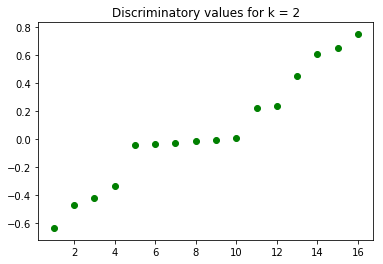

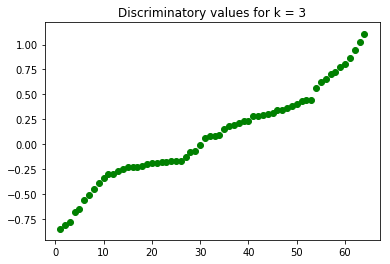

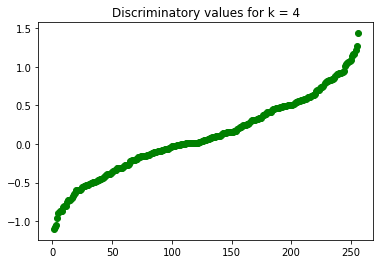

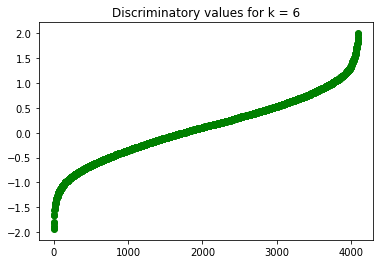

In [20]:
for k in ks:
    sorted_values=sorted(discriminators[k].values())
    xaxis=[i for i in range(1,len(sorted_values)+1)]
    plt.scatter(xaxis,sorted_values,color='green')
    plt.title(f'Discriminatory values for k = {k}')
    plt.show()

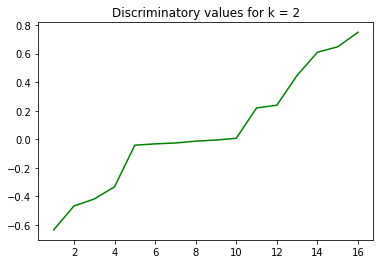

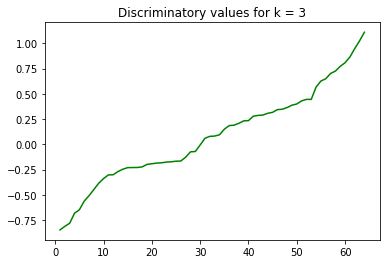

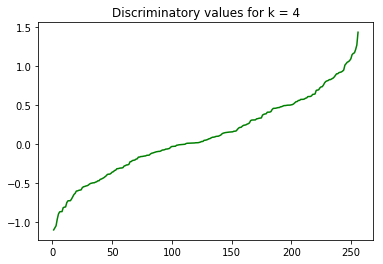

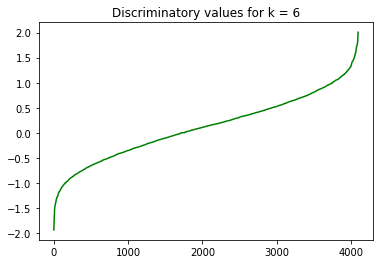

In [21]:
for k in ks:
    sorted_values=sorted(discriminators[k].values())
    xaxis=[i for i in range(1,len(sorted_values)+1)]
    plt.plot(xaxis,sorted_values,color='green')
    plt.title(f'Discriminatory values for k = {k}')
    plt.show()

In [22]:
for k in ks:
    discriminators_sorted=sorted(discriminators[k].items(), key=lambda item: item[1], reverse=True)
    print(f'------------------------------k={k}--------------------------------------------------')
    print('Highest values:')
    for i in range(16):
        print(f'kmer: {discriminators_sorted[i][0]}, value: {discriminators_sorted[i][1]}')
    print('Lowest values:')
    for i in range(1,17):
        print(f'kmer: {discriminators_sorted[-i][0]}, value: {discriminators_sorted[-i][1]}')


------------------------------k=2--------------------------------------------------
Highest values:
kmer: AA, value: 0.7500729882522265
kmer: TA, value: 0.6481121620555476
kmer: AT, value: 0.6094549759319928
kmer: TT, value: 0.44798525088687946
kmer: AC, value: 0.23841511308994728
kmer: CA, value: 0.2190485666321651
kmer: AG, value: 0.006593421260580823
kmer: GA, value: -0.005885890017173005
kmer: TC, value: -0.013736042250372199
kmer: GT, value: -0.02645097658799994
kmer: TG, value: -0.03280223512280575
kmer: CT, value: -0.041860350435746846
kmer: CC, value: -0.3336791005797199
kmer: GC, value: -0.4194398310245864
kmer: GG, value: -0.468150137457879
kmer: CG, value: -0.6360945820846531
Lowest values:
kmer: CG, value: -0.6360945820846531
kmer: GG, value: -0.468150137457879
kmer: GC, value: -0.4194398310245864
kmer: CC, value: -0.3336791005797199
kmer: CT, value: -0.041860350435746846
kmer: TG, value: -0.03280223512280575
kmer: GT, value: -0.02645097658799994
kmer: TC, value: -0.0137360